In [1]:
%matplotlib inline
import sys, os, time, gc, click, logging, pprint
from os.path import expanduser


In [2]:
%cd ..

/home/igr/src/model/dentate


In [3]:
user_home = expanduser("~")
neuron_home = f'{user_home}/bin/nrnpython/lib/python'
model_home = f'{user_home}/src/model'
dentate_home = f'{model_home}/dentate' 
template_paths=f'{dentate_home}/templates'
config_prefix=f'{dentate_home}/config'
dataset_prefix='/media/igr/d865f900-7fcd-45c7-a7a7-bd2a7391bc40/Data/DG'

In [4]:
import yaml
# creates 1) a yaml with synaptic parameters that have been optimized for selectivity
# 2) yaml with the same set of parameters as 1) but structured weight scaling factor set to 0
# format is { population : { gid: parameter list }}
# where parameter has the format: 
# postsynaptic pop., presynaptic populations, section type, receptor type, mechanism parameter, value
#
optimize_selectivity_params = \
{'GC': {111746: [['GC', ['BC', 'HCC', 'HC'], 'apical', 'GABA_A', 'weight', 0.20083801445743016],
                 ['GC', ['MC', 'ConMC'], 'apical', 'AMPA', ['weight', 'a'], 4.998258420749726],
                 ['GC', ['MPP', 'LPP'], 'apical', 'AMPA', ['weight', 'a'], 7.293403167741996],
                 ['GC', ['NGFC', 'MOPP'], 'apical', 'GABA_A', 'weight', 0.24140888269815286],
                 ['GC', 'AAC', 'ais', 'GABA_A', 'weight', 0.4534828996636781],
                 ['GC', 'BC', 'soma', 'GABA_A', 'weight', 0.412666789881585],
                 ['GC', 'NGFC', 'apical', 'GABA_B', 'weight', 0.005842658847846803]]}}
with open('selectivity_params_GC_111746_20210325.yaml', 'w') as f:
    yaml.dump(optimize_selectivity_params, f)
    
no_structured_weights_selectivity_params = \
{'GC': {111746: [['GC', ['BC', 'HCC', 'HC'], 'apical', 'GABA_A', 'weight', 0.20083801445743016],
                 ['GC', ['MC', 'ConMC'], 'apical', 'AMPA', ['weight', 'a'], 1.0],
                 ['GC', ['MPP', 'LPP'], 'apical', 'AMPA', ['weight', 'a'], 0.0],
                 ['GC', ['NGFC', 'MOPP'], 'apical', 'GABA_A', 'weight', 0.24140888269815286],
                 ['GC', 'AAC', 'ais', 'GABA_A', 'weight', 0.4534828996636781],
                 ['GC', 'BC', 'soma', 'GABA_A', 'weight', 0.412666789881585],
                 ['GC', 'NGFC', 'apical', 'GABA_B', 'weight', 0.005842658847846803]]}}
with open('no_structured_weights_selectivity_params_GC_111746_20210325.yaml', 'w') as f:
    yaml.dump(no_structured_weights_selectivity_params, f)

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module '_yaml' does not match runtime version 3.6
  return f(*args, **kwds)


### Simulation with structured weights and synaptic paramters optimized for selectivity

In [5]:
%run network_clamp.py go  -c Network_Clamp_GC_Exc_Sat_SLN_IN_Izh_extent.yaml \
         -p GC -g 111746  -t 9500 --n-trials 2 \
         --template-paths templates:{user_home}/src/model/DGC/Mateos-Aparicio2014 \
         --dataset-prefix {dataset_prefix} \
         --input-features-path {dataset_prefix}/Full_Scale_Control/DG_input_features_20200910_compressed.h5 \
         --input-features-namespaces 'Place Selectivity' \
         --input-features-namespaces 'Grid Selectivity' \
         --input-features-namespaces 'Constant Selectivity' \
         --arena-id A --trajectory-id Diag  \
         --recording-profile 'Network clamp default' \
         --use-coreneuron \
         --config-prefix config  --results-path results/netclamp \
         --results-file-id "demo" \
         --params-path selectivity_params_GC_111746_20210325.yaml

INFO:dentate:env.dataset_prefix = /media/igr/d865f900-7fcd-45c7-a7a7-bd2a7391bc40/Data/DG
INFO:dentate:env.cell_selection_path = None
INFO:dentate:env.data_file_path = /media/igr/d865f900-7fcd-45c7-a7a7-bd2a7391bc40/Data/DG/Slice/dentatenet_Full_Scale_GC_Exc_Sat_SLN_extent_arena_margin_20210203_compressed.h5
INFO:dentate:population_names = ['GC', 'MC']
INFO:dentate:population_ranges = {'GC': (0, 1000000), 'MC': (1000000, 30000), 'HC': (1030000, 9000), 'BC': (1039000, 3800), 'AAC': (1042800, 450), 'HCC': (1043250, 1400), 'NGFC': (1044650, 5000), 'IS': (1049650, 3000), 'MOPP': (1052650, 4000), 'MPP': (1056650, 38000), 'LPP': (1094650, 34000), 'CA3c': (1128650, 67000), 'ConMC': (1195650, 30000)}
INFO:dentate:attribute info: {'GC': {'LTD Structured Weights A': ['AMPA', 'syn_id'], 'LTP Structured Weights A': ['AMPA', 'syn_id'], 'Log-Normal Weights': ['AMPA', 'syn_id'], 'Normal Weights': ['AMPA', 'syn_id'], 'Place Selectivity A': ['Field Width', 'Num Fields', 'Peak Rate', 'Selectivity Type',

INFO:dentate.cells:cm_correction_factor for gid: 111746; apical25 seg 3: 1.221
INFO:dentate.cells:cm_correction_factor for gid: 111746; apical25 seg 4: 1.393
INFO:dentate.cells:init_nseg: changed DGC[0].sections[25].nseg 5 --> 5
INFO:dentate.cells:cm_correction_factor for gid: 111746; apical27 seg 0: 1.418
INFO:dentate.cells:cm_correction_factor for gid: 111746; apical27 seg 1: 1.450
INFO:dentate.cells:cm_correction_factor for gid: 111746; apical27 seg 2: 1.364
INFO:dentate.cells:cm_correction_factor for gid: 111746; apical27 seg 3: 1.262
INFO:dentate.cells:cm_correction_factor for gid: 111746; apical27 seg 4: 1.423
INFO:dentate.cells:init_nseg: changed DGC[0].sections[27].nseg 5 --> 5
INFO:dentate.cells:cm_correction_factor for gid: 111746; apical26 seg 0: 1.396
INFO:dentate.cells:cm_correction_factor for gid: 111746; apical26 seg 1: 1.480
INFO:dentate.cells:cm_correction_factor for gid: 111746; apical26 seg 2: 1.446
INFO:dentate.cells:cm_correction_factor for gid: 111746; apical26 se

INFO:dentate.cells:init_nseg: changed DGC[0].sections[14].nseg 13 --> 15
INFO:dentate.cells:cm_correction_factor for gid: 111746; apical13 seg 0: 1.397
INFO:dentate.cells:cm_correction_factor for gid: 111746; apical13 seg 1: 1.490
INFO:dentate.cells:cm_correction_factor for gid: 111746; apical13 seg 2: 1.471
INFO:dentate.cells:cm_correction_factor for gid: 111746; apical13 seg 3: 1.376
INFO:dentate.cells:cm_correction_factor for gid: 111746; apical13 seg 4: 1.495
INFO:dentate.cells:cm_correction_factor for gid: 111746; apical13 seg 5: 1.384
INFO:dentate.cells:cm_correction_factor for gid: 111746; apical13 seg 6: 1.401
INFO:dentate.cells:cm_correction_factor for gid: 111746; apical13 seg 7: 1.391
INFO:dentate.cells:cm_correction_factor for gid: 111746; apical13 seg 8: 1.315
INFO:dentate.cells:init_nseg: changed DGC[0].sections[13].nseg 9 --> 9
INFO:dentate.cells:cm_correction_factor for gid: 111746; apical9 seg 0: 1.327
INFO:dentate.cells:cm_correction_factor for gid: 111746; apical9 se

	1 
	1 


INFO:dentate.cells:init_nseg: changed DGC[0].sections[6].nseg 5 --> 7
INFO:dentate.cells:cm_correction_factor for gid: 111746; apical2 seg 0: 1.410
INFO:dentate.cells:cm_correction_factor for gid: 111746; apical2 seg 1: 1.277
INFO:dentate.cells:cm_correction_factor for gid: 111746; apical2 seg 2: 1.401
INFO:dentate.cells:cm_correction_factor for gid: 111746; apical2 seg 3: 1.506
INFO:dentate.cells:cm_correction_factor for gid: 111746; apical2 seg 4: 1.390
INFO:dentate.cells:cm_correction_factor for gid: 111746; apical2 seg 5: 1.317
INFO:dentate.cells:cm_correction_factor for gid: 111746; apical2 seg 6: 1.470
INFO:dentate.cells:init_nseg: changed DGC[0].sections[2].nseg 7 --> 7
INFO:dentate.cells:cm_correction_factor for gid: 111746; apical4 seg 0: 1.422
INFO:dentate.cells:cm_correction_factor for gid: 111746; apical4 seg 1: 1.465
INFO:dentate.cells:cm_correction_factor for gid: 111746; apical4 seg 2: 1.600
INFO:dentate.cells:cm_correction_factor for gid: 111746; apical4 seg 3: 1.461
IN

INFO:dentate.cells:cm_correction_factor for gid: 111746; apical17 seg 2: 1.457
INFO:dentate.cells:cm_correction_factor for gid: 111746; apical17 seg 3: 1.300
INFO:dentate.cells:cm_correction_factor for gid: 111746; apical17 seg 4: 1.392
INFO:dentate.cells:cm_correction_factor for gid: 111746; apical17 seg 5: 1.383
INFO:dentate.cells:cm_correction_factor for gid: 111746; apical17 seg 6: 1.348
INFO:dentate.cells:cm_correction_factor for gid: 111746; apical17 seg 7: 1.442
INFO:dentate.cells:cm_correction_factor for gid: 111746; apical17 seg 8: 1.589
INFO:dentate.cells:cm_correction_factor for gid: 111746; apical0 seg 0: 1.000
INFO:dentate.cells:cm_correction_factor for gid: 111746; apical8 seg 0: 1.000
INFO:dentate.cells:cm_correction_factor for gid: 111746; apical12 seg 0: 1.364
INFO:dentate.cells:cm_correction_factor for gid: 111746; apical12 seg 1: 1.533
INFO:dentate.cells:cm_correction_factor for gid: 111746; apical12 seg 2: 1.342
INFO:dentate.cells:cm_correction_factor for gid: 11174

INFO:dentate.cells:cm_correction_factor for gid: 111746; apical3 seg 8: 1.446
INFO:dentate.cells:cm_correction_factor for gid: 111746; apical3 seg 9: 1.420
INFO:dentate.cells:cm_correction_factor for gid: 111746; apical3 seg 10: 1.535
INFO:dentate.cells:g_pas_correction_factor for gid: 111746; apical15 seg 0: 1.000
INFO:dentate.cells:g_pas_correction_factor for gid: 111746; apical19 seg 0: 1.000
INFO:dentate.cells:g_pas_correction_factor for gid: 111746; apical25 seg 0: 1.003
INFO:dentate.cells:g_pas_correction_factor for gid: 111746; apical25 seg 1: 1.002
INFO:dentate.cells:g_pas_correction_factor for gid: 111746; apical25 seg 2: 1.002
INFO:dentate.cells:g_pas_correction_factor for gid: 111746; apical25 seg 3: 1.001
INFO:dentate.cells:g_pas_correction_factor for gid: 111746; apical25 seg 4: 1.001
INFO:dentate.cells:g_pas_correction_factor for gid: 111746; apical27 seg 0: 1.001
INFO:dentate.cells:g_pas_correction_factor for gid: 111746; apical27 seg 1: 1.001
INFO:dentate.cells:g_pas_co

INFO:dentate.cells:g_pas_correction_factor for gid: 111746; apical14 seg 7: 1.000
INFO:dentate.cells:g_pas_correction_factor for gid: 111746; apical14 seg 8: 1.000
INFO:dentate.cells:g_pas_correction_factor for gid: 111746; apical14 seg 9: 1.000
INFO:dentate.cells:g_pas_correction_factor for gid: 111746; apical14 seg 10: 1.000
INFO:dentate.cells:g_pas_correction_factor for gid: 111746; apical14 seg 11: 1.000
INFO:dentate.cells:g_pas_correction_factor for gid: 111746; apical14 seg 12: 1.000
INFO:dentate.cells:g_pas_correction_factor for gid: 111746; apical14 seg 13: 1.000
INFO:dentate.cells:g_pas_correction_factor for gid: 111746; apical14 seg 14: 1.000
INFO:dentate.cells:g_pas_correction_factor for gid: 111746; apical13 seg 0: 1.001
INFO:dentate.cells:g_pas_correction_factor for gid: 111746; apical13 seg 1: 1.001
INFO:dentate.cells:g_pas_correction_factor for gid: 111746; apical13 seg 2: 1.001
INFO:dentate.cells:g_pas_correction_factor for gid: 111746; apical13 seg 3: 1.001
INFO:dentat

INFO:dentate.cells:node: apical27, L: 79.1, diams: [0.75, 0.74, 0.74, 0.74, 0.73, 0.73, 0.73, 0.73, 0.72, 0.72, 0.72, 0.72, 0.71, 0.71, 0.71, 0.71, 0.71], children: 0, exc_syns: 148, inh_syns: 58, parent: apical25; connection_loc: 1.0
INFO:dentate.cells:node: apical26, L: 105.0, diams: [0.75, 0.75, 0.75, 0.75, 0.74, 0.74, 0.74, 0.74, 0.73, 0.73, 0.73, 0.73, 0.72, 0.72, 0.72, 0.72, 0.72, 0.71, 0.71, 0.71, 0.71, 0.71], children: 0, exc_syns: 229, inh_syns: 73, parent: apical25; connection_loc: 1.0
INFO:dentate.cells:node: apical20, L: 78.6, diams: [1.67, 1.70, 0.85, 0.84, 0.84, 0.83, 0.83, 0.83, 0.82, 0.82, 0.82, 0.81, 0.81, 0.81, 0.80, 0.80, 0.80], children: 2, exc_syns: 184, inh_syns: 50, parent: apical19; connection_loc: 1.0
INFO:dentate.cells:node: apical22, L: 105.5, diams: [0.80, 0.79, 0.78, 0.78, 0.78, 0.77, 0.77, 0.77, 0.76, 0.76, 0.76, 0.75, 0.75, 0.75, 0.75, 0.74, 0.74, 0.74, 0.74, 0.74, 0.73, 0.73], children: 2, exc_syns: 214, inh_syns: 78, parent: apical20; connection_loc: 1.

INFO:__main__:reading input features namespace Grid Selectivity A...
INFO:__main__:reading input features namespace Constant Selectivity A...
INFO:__main__:generating spike trains in time range [0.0, 9500.0] for 620 inputs from presynaptic population LPP...
INFO:__main__:reading input features namespace Place Selectivity A...
INFO:__main__:reading input features namespace Grid Selectivity A...
INFO:__main__:reading input features namespace Constant Selectivity A...
INFO:__main__:generating spike trains in time range [0.0, 9500.0] for 552 inputs from presynaptic population MC...
INFO:__main__:reading input features namespace Place Selectivity A...
INFO:__main__:reading input features namespace Grid Selectivity A...
INFO:__main__:reading input features namespace Constant Selectivity A...
INFO:__main__:generating spike trains in time range [0.0, 9500.0] for 89 inputs from presynaptic population MOPP...
INFO:__main__:reading input features namespace Place Selectivity A...
INFO:__main__:rea

DGC[0].sections[0] { nseg=1  L=26.474  Ra=150
	DGC[0].sections[28] connect DGC[0].sections[0] (0), 1
	/* First segment only */
	insert morphology { diam=2.04816}
	insert capacitance { cm=1}
	insert kap { gkabar_kap=0.0229659 vhalfn_kap=11 vhalfl_kap=-56}
	insert kdr { gkdrbar_kdr=0.00736602}
	insert k_ion { ek=-80}
	insert nas { sh_nas=7.01902 sha_nas=0 gbar_nas=0.0169442 ar_nas=1}
	insert na_ion { ena=50}
	insert pas { g_pas=2.68661e-06 e_pas=-74.5513}
	insert SatExp2Syn { sat=0.9 dur_onset=0.5 tau_offset=9 e=-75}
}
DGC[0].sections[1] { nseg=1  L=21.3068  Ra=150
	DGC[0].sections[0] connect DGC[0].sections[1] (0), 1
	/* First segment only */
	insert morphology { diam=1.11534}
	insert capacitance { cm=1.90769}
	insert kap { gkabar_kap=0.0393146 vhalfn_kap=11 vhalfl_kap=-56}
	insert kdr { gkdrbar_kdr=0.00736602}
	insert k_ion { ek=-80}
	insert nas { sh_nas=7.01902 sha_nas=0 gbar_nas=0.0169442 ar_nas=1}
	insert na_ion { ena=50}
	insert pas { g_pas=7.80982e-06 e_pas=-74.5513}
	insert SatEx

INFO:__main__:*** Running simulation with dt = 0.025 and tstop = 19500.00
INFO:__main__:*** Parameters: {'GC': {111746: [(SynParam(population='GC', source=['BC', 'HCC', 'HC'], sec_type='apical', syn_name='GABA_A', param_path='weight', param_range=None),
                  0.20083801445743016),
                 (SynParam(population='GC', source=['MC', 'ConMC'], sec_type='apical', syn_name='AMPA', param_path=['weight', 'a'], param_range=None),
                  4.998258420749726),
                 (SynParam(population='GC', source=['MPP', 'LPP'], sec_type='apical', syn_name='AMPA', param_path=['weight', 'a'], param_range=None),
                  7.293403167741996),
                 (SynParam(population='GC', source=['NGFC', 'MOPP'], sec_type='apical', syn_name='GABA_A', param_path='weight', param_range=None),
                  0.24140888269815286),
                 (SynParam(population='GC', source='AAC', sec_type='ais', syn_name='GABA_A', param_path='weight', param_range=None),
         

In [6]:
%run scripts/plot_network_clamp.py -v -g 111746 --t-max=9500. \
-p results/netclamp/Single_GC_Exc_Sat_SLN_IN_Izh_extent_results_demo_selectivity_params_GC_111746_20210325.h5 \
--state-variable v --lowpass-plot-type=subplot \
-i MPP -i LPP -i MC -i ConMC -i GC \
--target-input-features-path={dataset_prefix}/Slice/dentatenet_Full_Scale_GC_Exc_Sat_SLN_extent_arena_margin_20210106a_compressed.h5 \
--config-file Network_Clamp_GC_Exc_Sat_SLN_IN_Izh_extent.yaml \
--target-input-features-arena-id=A \
--target-input-features-trajectory-id=Diag \
--font-size 18 \
--line-width 2


INFO:dentate.statedata:Querying state data...
INFO:dentate.spikedata:Reading spike data for population ConMC in time range [0.0, 9500.0]...
INFO:dentate.spikedata:Read spike cell attributes for population ConMC...
INFO:dentate.spikedata: Read 9386 spikes and 2 trials for population ConMC
INFO:dentate.spikedata:Reading spike data for population LPP in time range [0.0, 9500.0]...
INFO:dentate.spikedata:Read spike cell attributes for population LPP...
INFO:dentate.spikedata: Read 9193 spikes and 2 trials for population LPP
INFO:dentate.spikedata:Reading spike data for population MPP in time range [0.0, 9500.0]...
INFO:dentate.spikedata:Read spike cell attributes for population MPP...
INFO:dentate.spikedata: Read 18559 spikes and 2 trials for population MPP
INFO:dentate.spikedata:Reading spike data for population MC in time range [0.0, 9500.0]...
INFO:dentate.spikedata:Read spike cell attributes for population MC...
INFO:dentate.spikedata: Read 8564 spikes and 2 trials for population MC
IN

AttributeError: 'list' object has no attribute 'shape'

/home/igr/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


### Simulation without structured weights and synaptic paramters optimized for selectivity

In [10]:
%run network_clamp.py go  -c Network_Clamp_GC_Exc_Sat_SLN_IN_Izh_extent.yaml \
         -p GC -g 111746  -t 9500 \
         --template-paths templates:{user_home}/src/model/DGC/Mateos-Aparicio2014 \
         --dataset-prefix {dataset_prefix} \
         --input-features-path {dataset_prefix}/Full_Scale_Control/DG_input_features_20200910_compressed.h5 \
         --input-features-namespaces 'Place Selectivity' \
         --input-features-namespaces 'Grid Selectivity' \
         --input-features-namespaces 'Constant Selectivity' \
         --arena-id A --trajectory-id Diag  --n-trials 1 \
         --recording-profile 'Network clamp default' \
         --use-coreneuron \
         --config-prefix config  --results-path results/netclamp \
         --results-file-id "demo" \
         --params-path no_structured_weights_selectivity_params_GC_111746_20210325.yaml

INFO:dentate:env.dataset_prefix = /media/igr/d865f900-7fcd-45c7-a7a7-bd2a7391bc40/Data/DG
INFO:dentate:env.cell_selection_path = None
INFO:dentate:env.data_file_path = /media/igr/d865f900-7fcd-45c7-a7a7-bd2a7391bc40/Data/DG/Slice/dentatenet_Full_Scale_GC_Exc_Sat_SLN_extent_arena_margin_20210203_compressed.h5
INFO:dentate:population_names = ['GC', 'MC']
INFO:dentate:population_ranges = {'GC': (0, 1000000), 'MC': (1000000, 30000), 'HC': (1030000, 9000), 'BC': (1039000, 3800), 'AAC': (1042800, 450), 'HCC': (1043250, 1400), 'NGFC': (1044650, 5000), 'IS': (1049650, 3000), 'MOPP': (1052650, 4000), 'MPP': (1056650, 38000), 'LPP': (1094650, 34000), 'CA3c': (1128650, 67000), 'ConMC': (1195650, 30000)}
INFO:dentate:attribute info: {'GC': {'LTD Structured Weights A': ['AMPA', 'syn_id'], 'LTP Structured Weights A': ['AMPA', 'syn_id'], 'Log-Normal Weights': ['AMPA', 'syn_id'], 'Normal Weights': ['AMPA', 'syn_id'], 'Place Selectivity A': ['Field Width', 'Num Fields', 'Peak Rate', 'Selectivity Type',

INFO:dentate.cells:init_nseg: changed DGC[2].sections[25].nseg 5 --> 5
INFO:dentate.cells:cm_correction_factor for gid: 111746; apical27 seg 0: 1.418
INFO:dentate.cells:cm_correction_factor for gid: 111746; apical27 seg 1: 1.450
INFO:dentate.cells:cm_correction_factor for gid: 111746; apical27 seg 2: 1.364
INFO:dentate.cells:cm_correction_factor for gid: 111746; apical27 seg 3: 1.262
INFO:dentate.cells:cm_correction_factor for gid: 111746; apical27 seg 4: 1.423
INFO:dentate.cells:init_nseg: changed DGC[2].sections[27].nseg 5 --> 5
INFO:dentate.cells:cm_correction_factor for gid: 111746; apical26 seg 0: 1.396
INFO:dentate.cells:cm_correction_factor for gid: 111746; apical26 seg 1: 1.480
INFO:dentate.cells:cm_correction_factor for gid: 111746; apical26 seg 2: 1.446
INFO:dentate.cells:cm_correction_factor for gid: 111746; apical26 seg 3: 1.587
INFO:dentate.cells:cm_correction_factor for gid: 111746; apical26 seg 4: 1.413
INFO:dentate.cells:cm_correction_factor for gid: 111746; apical26 se

INFO:dentate.cells:cm_correction_factor for gid: 111746; apical13 seg 1: 1.490
INFO:dentate.cells:cm_correction_factor for gid: 111746; apical13 seg 2: 1.471
INFO:dentate.cells:cm_correction_factor for gid: 111746; apical13 seg 3: 1.376
INFO:dentate.cells:cm_correction_factor for gid: 111746; apical13 seg 4: 1.495
INFO:dentate.cells:cm_correction_factor for gid: 111746; apical13 seg 5: 1.384
INFO:dentate.cells:cm_correction_factor for gid: 111746; apical13 seg 6: 1.401
INFO:dentate.cells:cm_correction_factor for gid: 111746; apical13 seg 7: 1.391
INFO:dentate.cells:cm_correction_factor for gid: 111746; apical13 seg 8: 1.315
INFO:dentate.cells:init_nseg: changed DGC[2].sections[13].nseg 9 --> 9
INFO:dentate.cells:cm_correction_factor for gid: 111746; apical9 seg 0: 1.327
INFO:dentate.cells:cm_correction_factor for gid: 111746; apical9 seg 1: 1.334
INFO:dentate.cells:cm_correction_factor for gid: 111746; apical9 seg 2: 1.445
INFO:dentate.cells:init_nseg: changed DGC[2].sections[9].nseg 3

INFO:dentate.cells:cm_correction_factor for gid: 111746; apical22 seg 3: 1.300
INFO:dentate.cells:cm_correction_factor for gid: 111746; apical22 seg 4: 1.369
INFO:dentate.cells:cm_correction_factor for gid: 111746; apical22 seg 5: 1.452
INFO:dentate.cells:cm_correction_factor for gid: 111746; apical22 seg 6: 1.523
INFO:dentate.cells:cm_correction_factor for gid: 111746; apical24 seg 0: 1.618
INFO:dentate.cells:cm_correction_factor for gid: 111746; apical24 seg 1: 1.478
INFO:dentate.cells:cm_correction_factor for gid: 111746; apical24 seg 2: 1.262
INFO:dentate.cells:cm_correction_factor for gid: 111746; apical24 seg 3: 1.440
INFO:dentate.cells:cm_correction_factor for gid: 111746; apical24 seg 4: 1.678
INFO:dentate.cells:cm_correction_factor for gid: 111746; apical23 seg 0: 1.458
INFO:dentate.cells:cm_correction_factor for gid: 111746; apical23 seg 1: 1.626
INFO:dentate.cells:cm_correction_factor for gid: 111746; apical23 seg 2: 1.613
INFO:dentate.cells:cm_correction_factor for gid: 111

INFO:dentate.cells:cm_correction_factor for gid: 111746; apical10 seg 3: 1.449
INFO:dentate.cells:cm_correction_factor for gid: 111746; apical10 seg 4: 1.440
INFO:dentate.cells:cm_correction_factor for gid: 111746; apical10 seg 5: 1.291
INFO:dentate.cells:cm_correction_factor for gid: 111746; apical10 seg 6: 1.364
INFO:dentate.cells:cm_correction_factor for gid: 111746; apical10 seg 7: 1.480
INFO:dentate.cells:cm_correction_factor for gid: 111746; apical10 seg 8: 1.541
INFO:dentate.cells:cm_correction_factor for gid: 111746; apical10 seg 9: 1.358
INFO:dentate.cells:cm_correction_factor for gid: 111746; apical10 seg 10: 1.418
INFO:dentate.cells:cm_correction_factor for gid: 111746; apical1 seg 0: 1.381
INFO:dentate.cells:cm_correction_factor for gid: 111746; apical5 seg 0: 1.338
INFO:dentate.cells:cm_correction_factor for gid: 111746; apical5 seg 1: 1.293
INFO:dentate.cells:cm_correction_factor for gid: 111746; apical5 seg 2: 1.349
INFO:dentate.cells:cm_correction_factor for gid: 111746

INFO:dentate.cells:g_pas_correction_factor for gid: 111746; apical21 seg 5: 1.000
INFO:dentate.cells:g_pas_correction_factor for gid: 111746; apical21 seg 6: 1.000
INFO:dentate.cells:g_pas_correction_factor for gid: 111746; apical21 seg 7: 1.000
INFO:dentate.cells:g_pas_correction_factor for gid: 111746; apical21 seg 8: 1.000
INFO:dentate.cells:g_pas_correction_factor for gid: 111746; apical21 seg 9: 1.000
INFO:dentate.cells:g_pas_correction_factor for gid: 111746; apical21 seg 10: 1.000
INFO:dentate.cells:g_pas_correction_factor for gid: 111746; apical21 seg 11: 1.000
INFO:dentate.cells:g_pas_correction_factor for gid: 111746; apical21 seg 12: 1.000
INFO:dentate.cells:g_pas_correction_factor for gid: 111746; apical21 seg 13: 1.000
INFO:dentate.cells:g_pas_correction_factor for gid: 111746; apical21 seg 14: 1.000
INFO:dentate.cells:g_pas_correction_factor for gid: 111746; apical21 seg 15: 1.000
INFO:dentate.cells:g_pas_correction_factor for gid: 111746; apical21 seg 16: 1.000
INFO:dent

INFO:dentate.cells:g_pas_correction_factor for gid: 111746; apical7 seg 1: 1.001
INFO:dentate.cells:g_pas_correction_factor for gid: 111746; apical7 seg 2: 1.001
INFO:dentate.cells:g_pas_correction_factor for gid: 111746; apical7 seg 3: 1.000
INFO:dentate.cells:g_pas_correction_factor for gid: 111746; apical7 seg 4: 1.000
INFO:dentate.cells:g_pas_correction_factor for gid: 111746; apical7 seg 5: 1.001
INFO:dentate.cells:g_pas_correction_factor for gid: 111746; apical7 seg 6: 1.000
INFO:dentate.cells:g_pas_correction_factor for gid: 111746; apical6 seg 0: 1.001
INFO:dentate.cells:g_pas_correction_factor for gid: 111746; apical6 seg 1: 1.001
INFO:dentate.cells:g_pas_correction_factor for gid: 111746; apical6 seg 2: 1.000
INFO:dentate.cells:g_pas_correction_factor for gid: 111746; apical6 seg 3: 1.000
INFO:dentate.cells:g_pas_correction_factor for gid: 111746; apical6 seg 4: 1.000
INFO:dentate.cells:g_pas_correction_factor for gid: 111746; apical6 seg 5: 1.000
INFO:dentate.cells:g_pas_cor

INFO:dentate.cells:node: apical9, L: 53.3, diams: [0.83, 0.82, 0.82, 0.81, 0.81, 0.80, 0.80, 0.80, 0.79, 0.79, 0.79, 0.78], children: 2, exc_syns: 106, inh_syns: 38, parent: apical8; connection_loc: 1.0
INFO:dentate.cells:node: apical11, L: 155.4, diams: [0.78, 0.78, 0.77, 0.77, 0.77, 0.76, 0.76, 0.76, 0.75, 0.75, 0.75, 0.75, 0.74, 0.74, 0.74, 0.74, 0.73, 0.73, 0.73, 0.73, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.71, 0.71, 0.71, 0.71, 0.71, 0.71], children: 0, exc_syns: 325, inh_syns: 115, parent: apical9; connection_loc: 1.0
INFO:dentate.cells:node: apical10, L: 160.0, diams: [0.78, 0.78, 0.78, 0.77, 0.77, 0.77, 0.76, 0.76, 0.76, 0.76, 0.75, 0.75, 0.75, 0.74, 0.74, 0.74, 0.74, 0.73, 0.73, 0.73, 0.73, 0.73, 0.72, 0.72, 0.72, 0.72, 0.72, 0.71, 0.71, 0.71, 0.71, 0.71, 0.71], children: 0, exc_syns: 334, inh_syns: 123, parent: apical9; connection_loc: 1.0
INFO:dentate.cells:node: apical1, L: 21.3, diams: [1.75, 1.69, 0.84, 0.83, 0.83, 0.83], children: 2, exc_syns: 61, inh_syns: 9, parent: api

DGC[2].sections[0] { nseg=1  L=26.474  Ra=150
	DGC[2].sections[28] connect DGC[2].sections[0] (0), 1
	/* First segment only */
	insert morphology { diam=2.04816}
	insert capacitance { cm=1}
	insert kap { gkabar_kap=0.0229659 vhalfn_kap=11 vhalfl_kap=-56}
	insert kdr { gkdrbar_kdr=0.00736602}
	insert k_ion { ek=-80}
	insert nas { sh_nas=7.01902 sha_nas=0 gbar_nas=0.0169442 ar_nas=1}
	insert na_ion { ena=50}
	insert pas { g_pas=2.68661e-06 e_pas=-74.5513}
	insert SatExp2Syn { sat=0.9 dur_onset=0.5 tau_offset=9 e=-75}
}
DGC[2].sections[1] { nseg=1  L=21.3068  Ra=150
	DGC[2].sections[0] connect DGC[2].sections[1] (0), 1
	/* First segment only */
	insert morphology { diam=1.11534}
	insert capacitance { cm=1.90769}
	insert kap { gkabar_kap=0.0393146 vhalfn_kap=11 vhalfl_kap=-56}
	insert kdr { gkdrbar_kdr=0.00736602}
	insert k_ion { ek=-80}
	insert nas { sh_nas=7.01902 sha_nas=0 gbar_nas=0.0169442 ar_nas=1}
	insert na_ion { ena=50}
	insert pas { g_pas=7.80982e-06 e_pas=-74.5513}
	insert SatEx

INFO:__main__:*** Running simulation with dt = 0.025 and tstop = 9750.00
INFO:__main__:*** Parameters: {'GC': {111746: [(SynParam(population='GC', source=['BC', 'HCC', 'HC'], sec_type='apical', syn_name='GABA_A', param_path='weight', param_range=None),
                  0.20083801445743016),
                 (SynParam(population='GC', source=['MC', 'ConMC'], sec_type='apical', syn_name='AMPA', param_path=['weight', 'a'], param_range=None),
                  1.0),
                 (SynParam(population='GC', source=['MPP', 'LPP'], sec_type='apical', syn_name='AMPA', param_path=['weight', 'a'], param_range=None),
                  0.0),
                 (SynParam(population='GC', source=['NGFC', 'MOPP'], sec_type='apical', syn_name='GABA_A', param_path='weight', param_range=None),
                  0.24140888269815286),
                 (SynParam(population='GC', source='AAC', sec_type='ais', syn_name='GABA_A', param_path='weight', param_range=None),
                  0.4534828996636781),

INFO:dentate.statedata:Querying state data...
INFO:dentate.spikedata:Reading spike data for population ConMC in time range [-250.0, 9500.0]...
INFO:dentate.spikedata:Read spike cell attributes for population ConMC...
INFO:dentate.spikedata: Read 4738 spikes and 1 trials for population ConMC
INFO:dentate.spikedata:Reading spike data for population LPP in time range [-250.0, 9500.0]...
INFO:dentate.spikedata:Read spike cell attributes for population LPP...
INFO:dentate.spikedata: Read 4646 spikes and 1 trials for population LPP
INFO:dentate.spikedata:Reading spike data for population MPP in time range [-250.0, 9500.0]...
INFO:dentate.spikedata:Read spike cell attributes for population MPP...
INFO:dentate.spikedata: Read 9463 spikes and 1 trials for population MPP
INFO:dentate.spikedata:Reading spike data for population MC in time range [-250.0, 9500.0]...
INFO:dentate.spikedata:Read spike cell attributes for population MC...
INFO:dentate.spikedata: Read 4379 spikes and 1 trials for popul

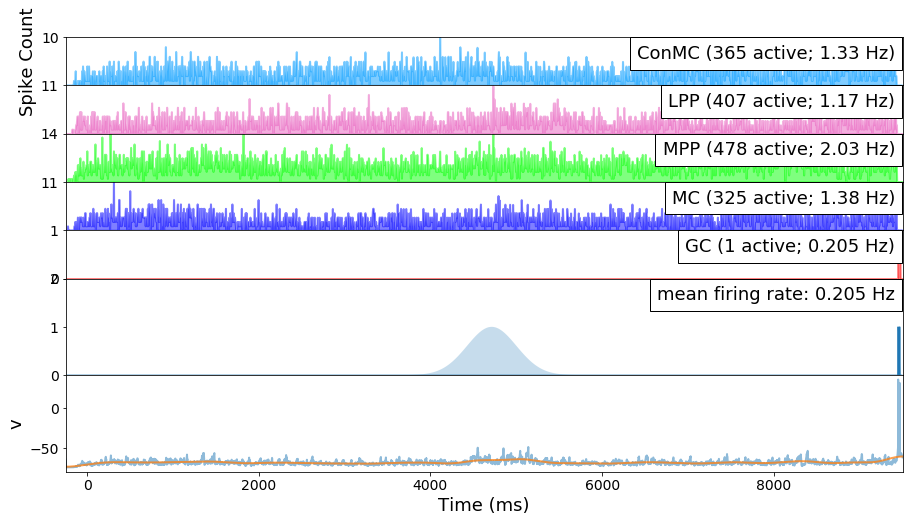

In [13]:
%run scripts/plot_network_clamp.py -v -g 111746 --t-min -250 --t-max=9500. \
-p results/netclamp/Single_GC_Exc_Sat_SLN_IN_Izh_extent_results_demo_no_structured_weights_selectivity_params_GC_111746_20210325.h5 \
--state-variable v --lowpass-plot-type=subplot \
-i MPP -i LPP -i MC -i ConMC -i GC \
--target-input-features-path={dataset_prefix}/Slice/dentatenet_Full_Scale_GC_Exc_Sat_SLN_extent_arena_margin_20210106a_compressed.h5 \
--config-file Network_Clamp_GC_Exc_Sat_SLN_IN_Izh_extent.yaml \
--target-input-features-arena-id=A \
--target-input-features-trajectory-id=Diag \
--lowpass-plot-type=overlay \
--font-size 18 \
--line-width 2
